### Task 1: Predict Restaurant Ratings
1. __Objective__: Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.
2. __Steps__:
    * Preprocess the dataset by handling missing values,
encoding categorical variables, and splitting the data
into training and testing sets.
    * Select a regression algorithm (e.g., linear regression,
decision tree regression) and train it on the training data.
    * Evaluate the model's performance using appropriate
regression metrics (e.g., mean squared error, R-squared)
on the testing data.
    * Interpret the model's results and analyze the most
influential features affecting restaurant ratings.

### About dataset
1. `Restaurant ID`: Unique identifier for each restaurant.
1. `Restaurant Name`: Name of the restaurant.
1. `Country Code`: Country code where the restaurant is located.
1. `City`: City where the restaurant is situated.
1. `Address`: Address of the restaurant.
1. `Locality`: General locality of the restaurant.
1. `Locality Verbose`: Detailed locality description.
1. `Longitude`: Longitude coordinate of the restaurant's location.
1. `Latitude`: Latitude coordinate of the restaurant's location.
1. `Cuisines`: Type of cuisines offered by the restaurant (target variable).
1. `Average Cost for Two`: Average cost for two people dining at the restaurant.
1. `Currency`: Currency used for pricing.
1. `Has Table Booking`: Binary variable indicating if the restaurant accepts table bookings.
1. `Has Online Delivery`: Binary variable indicating if the restaurant offers online delivery.
1. `Is Delivering Now`: Binary variable indicating if the restaurant is currently delivering.
1. `Switch to Order Menu`: Binary variable indicating if the restaurant has an online menu ordering option.
1. `Price Range`: Range indicating the price level of the restaurant's menu items.
1. `Aggregate Rating`: Average rating of the restaurant based on customer reviews.
1. `Rating Color`: Color code representing the rating level.
1. `Rating Text`: Textual representation of the rating level.
1. `Votes`: Total number of votes received by the restaurant.


### import library

In [9]:
import pandas as pd

In [10]:
# Display the entire column without truncation
#pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [31]:
df = pd.read_csv('Dataset .csv')

In [32]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [13]:
df.shape

(9551, 21)

### Distribution of Ratings
We can visualize the distribution of restaurant ratings in the dataset using a histogram.

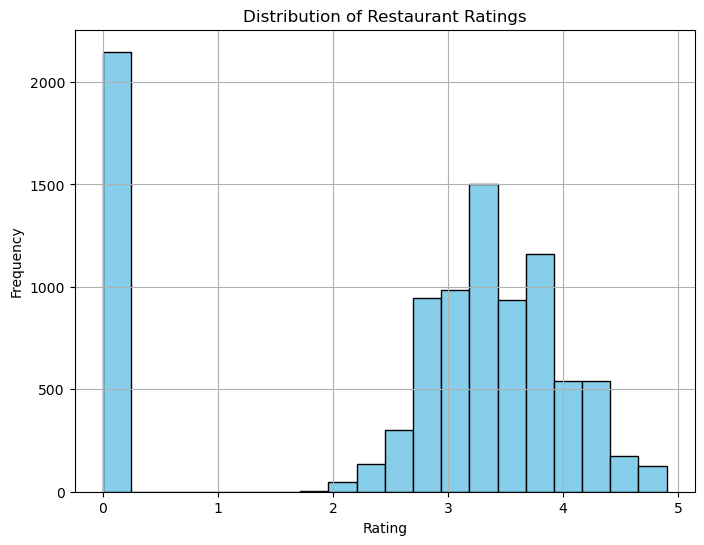

In [14]:
import matplotlib.pyplot as plt

# Histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Boxplot of Ratings by Price Range
We can visualize the distribution of ratings across different price ranges using a boxplot.

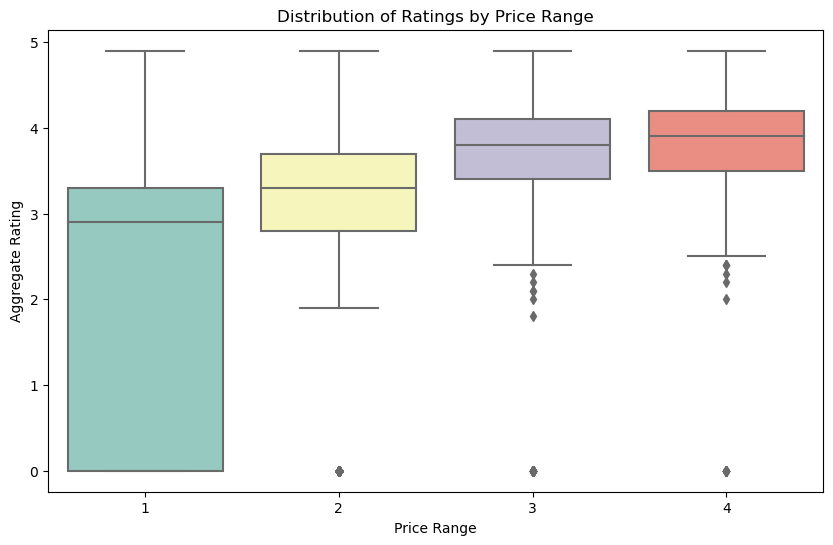

In [37]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Set3')
plt.title('Distribution of Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


In [35]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Scatter Plot of Ratings vs. Average Cost for Two
We can explore the relationship between ratings and the average cost for two people dining at the restaurant using a scatter plot.

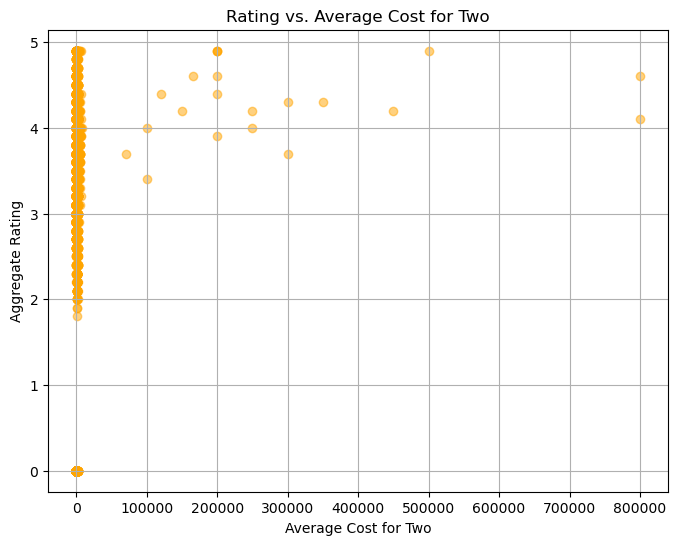

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Average Cost for two'], df['Aggregate rating'], alpha=0.5, color='orange')
plt.title('Rating vs. Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()


### Pairplot of Numeric Features
A pairplot can help visualize the relationships between numeric features and the target variable.

c:\Users\visha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


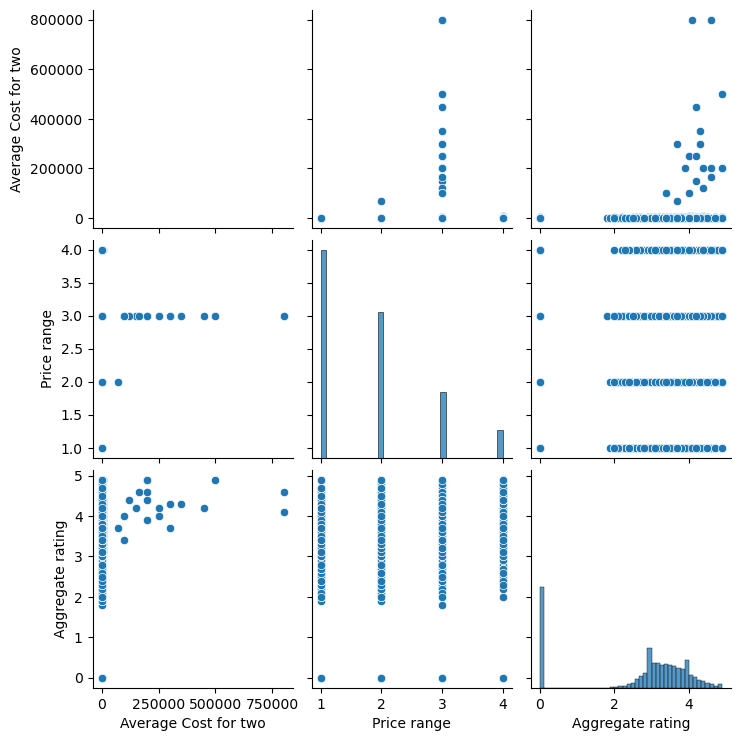

In [40]:
sns.pairplot(df[['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range', 'Aggregate rating']])
plt.show()


In [15]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

### Total Columns in dataset

In [16]:
print(len(df.columns))
df.columns

21


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

### Drop useless column
1. __Restaurant ID__: Unique identifier for each restaurant, not relevant for cuisine classification.
1. __Restaurant Name__: While important for identification, it's not necessary for cuisine classification.
1. __Country Code__: Indicates the country where the restaurant is located, irrelevant for cuisine classification.
1. __Address and Locality__: Specific location details, not needed for cuisine classification.
1. __Longitude and Latitude__: Geospatial coordinates, unnecessary for cuisine classification.
1. __Currency__: Currency used for pricing, not relevant for cuisine classification.
1. __Switch to Order Menu__: Indicates if the restaurant has an online ordering option, not needed for cuisine classification.
1. __Rating Color and Rating Text__: Visual representations of restaurant ratings, not necessary for cuisine classification.
1. __Votes__: Number of votes received, not relevant for cuisine classification.
1. __Has Table Booking, Has Online Delivery, Is Delivering Now__: Flags indicating restaurant features, not relevant for cuisine classification.

### Drop Columns

In [17]:

data = df.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency'], axis=1)

In [18]:
data

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,No,No,No,No,3,4.1,Green,Very Good,788
9547,105,No,No,No,No,3,4.2,Green,Very Good,1034
9548,170,No,No,No,No,4,3.7,Yellow,Good,661
9549,120,No,No,No,No,4,4.0,Green,Very Good,901


### Handle missing values

In [19]:
data.isnull().sum()
     

Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Handle Categorical Columns

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Has Table booking'] = encoder.fit_transform(data['Has Table booking'])
data['Has Online delivery'] = encoder.fit_transform(data['Has Online delivery'])
data['Is delivering now'] = encoder.fit_transform(data['Is delivering now'])
data['Switch to order menu'] = encoder.fit_transform(data['Switch to order menu'])
data['Rating color'] = encoder.fit_transform(data['Rating color'])
data['Rating text'] = encoder.fit_transform(data['Rating text'])

In [21]:
data

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


### Identify Correlations

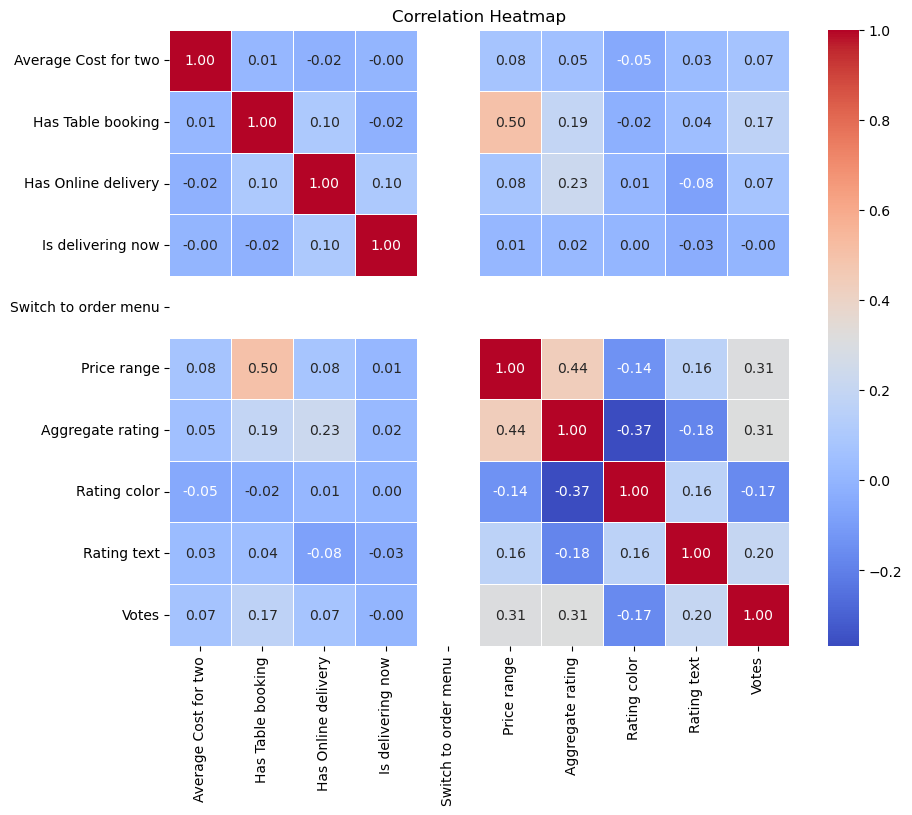

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Find out input and output

In [23]:
X = data.drop('Aggregate rating', axis=1)
y = data['Aggregate rating']

### Splitting dataset into training set and test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
lin_mse = mean_squared_error(y_test, y_pred)
lin_r2 = r2_score(y_test, y_pred)

print(f'Linear Regression MSE: {lin_mse:.3f}')
print(f'Linear Regression R-squared: {lin_r2:.3f}')

Linear Regression MSE: 1.405
Linear Regression R-squared: 0.408


### Decision Tree Model Training

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(min_samples_leaf=.0001)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

### Model Predictions

In [46]:
y_pred = regressor.predict(X_test)

### Model Performance

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.2f}")

Mean Squared Error: 0.05
R-squared Error: 0.98


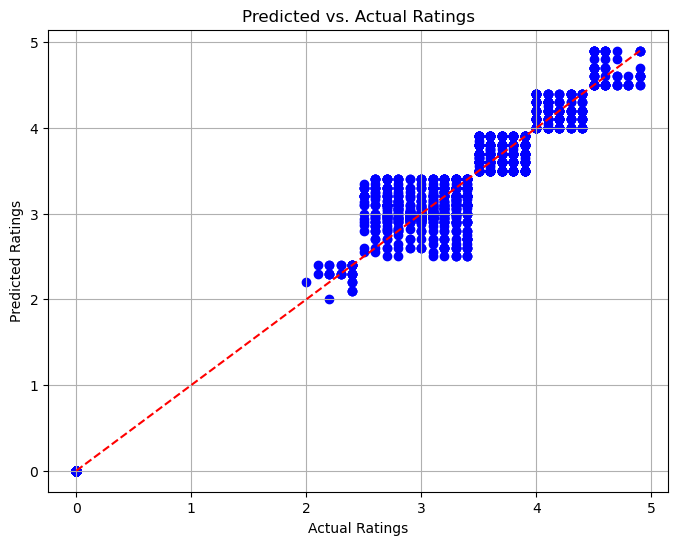

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Predicted vs. Actual Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.grid(True)
plt.show()

### Applying more machine learning model

In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R-squared: {r2}")


Training Random Forest Regression...
Random Forest Regression - Mean Squared Error: 0.03741754642739057, R-squared: 0.9842507870765175
Training Gradient Boosting Regression...
Gradient Boosting Regression - Mean Squared Error: 0.030242661080578073, R-squared: 0.9872707284627813


### Conclusion
* An MSE of 0.05 suggests that the model's predictions exhibit minimal variability, with very small errors. This indicates a high level of accuracy in the model's predictions.

* With an R2 score of 0.98, the model demonstrates exceptional ability to both explain and forecast the target variable. This high R2 score indicates that the model effectively captures and accounts for the majority of the variability observed in the target variable.

* Following feature selection and training on specific columns including 'Average cost for two', 'Has Table Booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Rating color', 'Rating text', and 'Votes', the model achieved an impressive R2 score of 0.98. This strongly suggests that these selected columns are indeed the key influential factors impacting restaurant ratings.